In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

     petal_length  petal_width    species
42            1.3          0.2     setosa
141           5.1          2.3  virginica
28            1.4          0.2     setosa
45            1.4          0.3     setosa
140           5.6          2.4  virginica
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


<Axes: xlabel='species'>

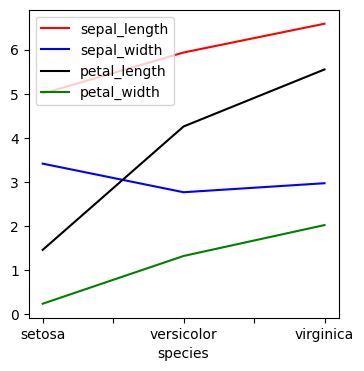

In [3]:
path = "./Data/eda/iris_data.csv"

data = pd.read_csv(path)

df = pd.DataFrame(data)
sample = df.sample(n = 5, replace = False)
print(sample.iloc[:,-3:])

print(df.groupby('species').mean())

#Pandas DataFrame approach
df.groupby('species').mean().plot(color=['red','blue','black','green'], fontsize=10.0, figsize=(4,4))

Text(0.5, 1.0, 'Sepal and Petal Measurements')

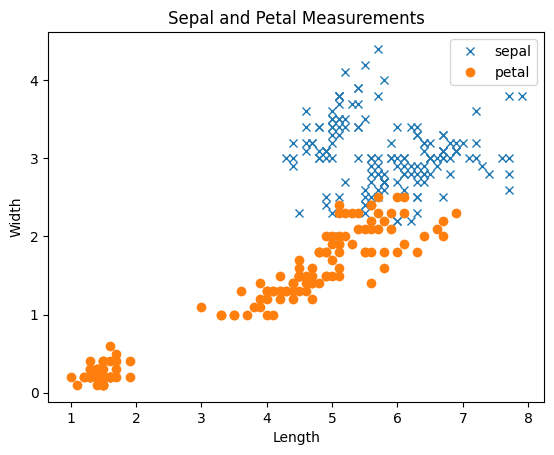

In [4]:
plt.plot(df.sepal_length, 
         df.sepal_width,
         ls='', marker='x',
         label='sepal')

plt.plot(df.petal_length, 
         df.petal_width,
         ls='', marker='o', 
         label='petal')

plt.legend()
plt.xlabel("Length")  # Optional: Label for the x-axis
plt.ylabel("Width")   # Optional: Label for the y-axis
plt.title("Sepal and Petal Measurements")  # Optional: Title of the plot

(array([ 4.,  1.,  4.,  2.,  5., 16.,  9.,  4.,  1.,  6., 13.,  8.,  7.,
         3.,  6., 10.,  9.,  7.,  5.,  2., 11.,  4.,  1.,  1.,  4.,  1.,
         0.,  1.,  4.,  1.]),
 array([4.3 , 4.42, 4.54, 4.66, 4.78, 4.9 , 5.02, 5.14, 5.26, 5.38, 5.5 ,
        5.62, 5.74, 5.86, 5.98, 6.1 , 6.22, 6.34, 6.46, 6.58, 6.7 , 6.82,
        6.94, 7.06, 7.18, 7.3 , 7.42, 7.54, 7.66, 7.78, 7.9 ]),
 <BarContainer object of 30 artists>)

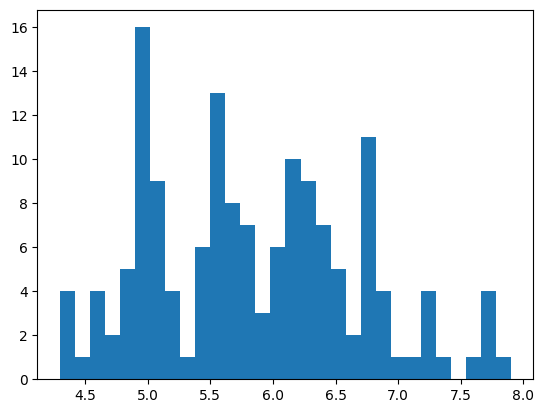

In [5]:
plt.hist(df.sepal_length, bins=30)

[Text(0.5, 0, 'xlabel'), Text(0, 0.5, 'ylabel'), Text(0.5, 1.0, 'Title')]

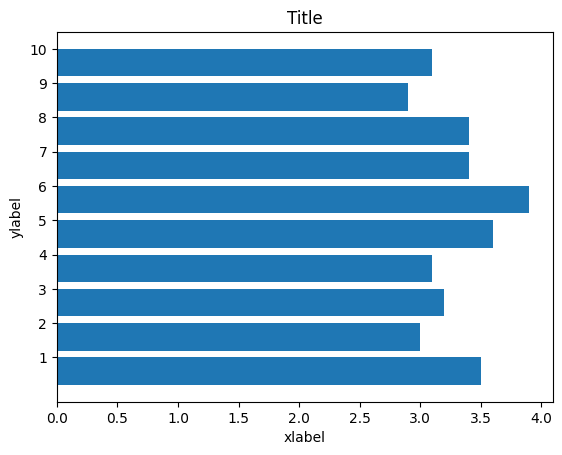

In [6]:
fig, ax = plt.subplots()
ax.barh(np.arange(10), 
       df.sepal_width.iloc[:10])

ax.set_yticks(np.arange(0.4,10.4,1.0))
ax.set_yticklabels(np.arange(1, 11))
ax.set(xlabel='xlabel', ylabel='ylabel', title='Title')

## 

/home/club/myenv/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


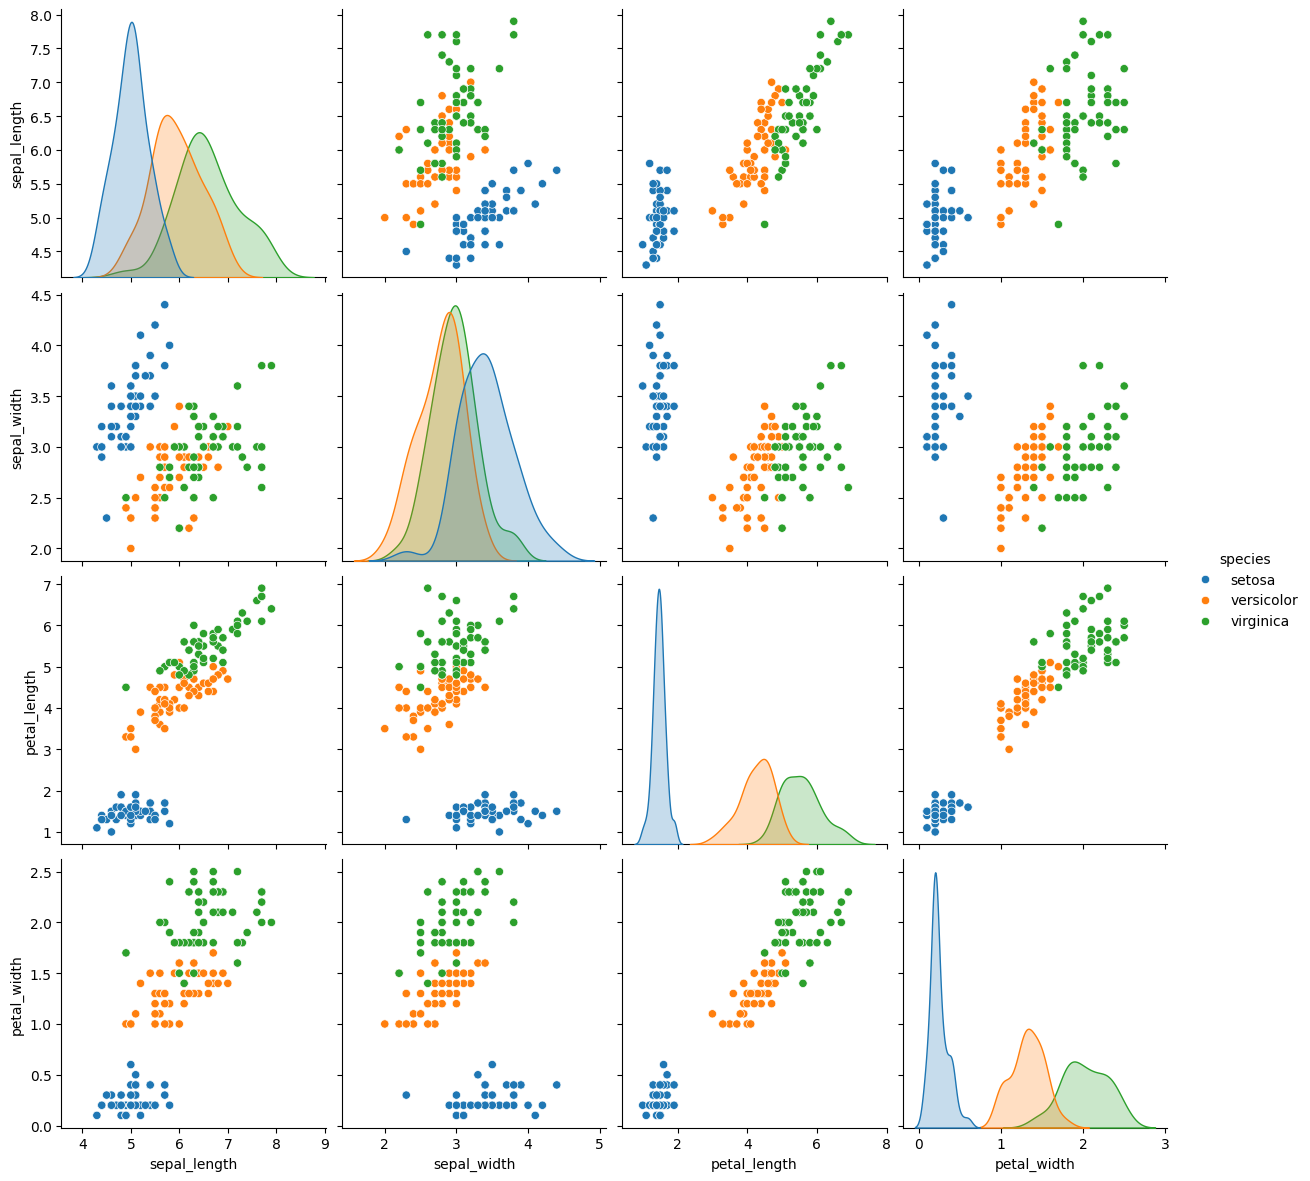

In [7]:
sns.pairplot(df,hue='species',size=3)

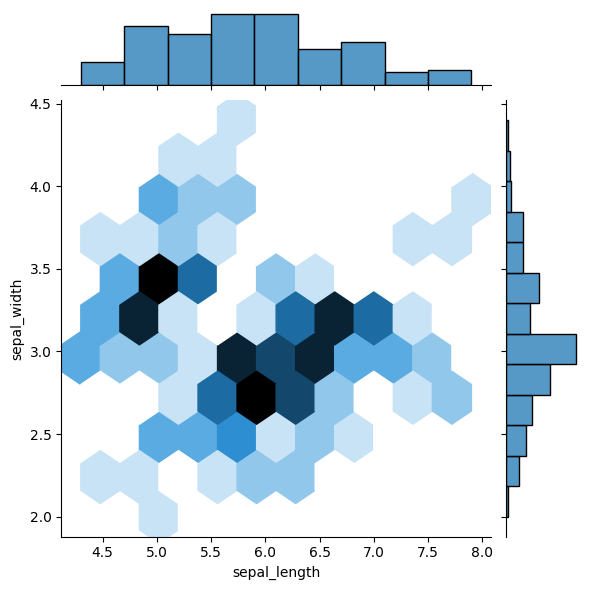

In [8]:
#SEaborn hexbin plot
sns.jointplot(x=data['sepal_length'], y=data['sepal_width'],kind='hex')

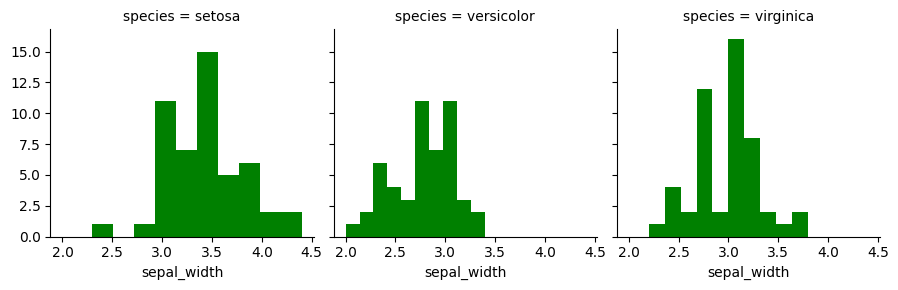

In [9]:
#Seaborn plot, Facet Grid
#First plot statement
plot = sns.FacetGrid(data,
                     col='species',
                    margin_titles=True)
plot.map(plt.hist, 'sepal_width', color='green')

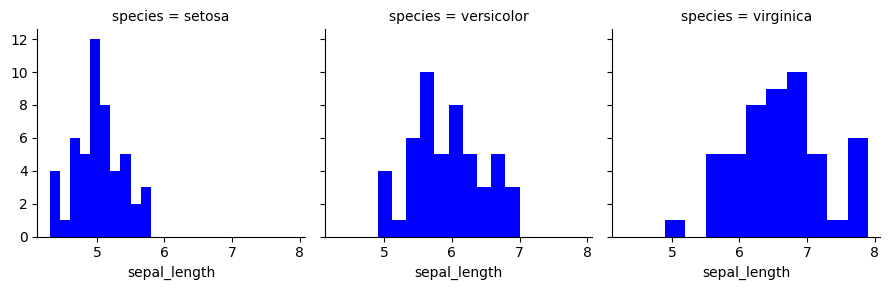

In [10]:
#second plot statement
plot = sns.FacetGrid(data,
                     col='species',
                    margin_titles=True)
plot.map(plt.hist, 'sepal_length', color='blue')

# Question 1
Load the data from the file using the techniques learned today. Examine it.

Determine the following:

- The number of data points (rows). (Hint: check out the dataframe ```.shape``` attribute.)
- The column names. (Hint: check out the dataframe ```.columns``` attribute.)
- The data types for each column. (Hint: check out the dataframe ```.dtypes``` attribute.)

In [11]:
#Number of rows
print(df.shape[0])

#Column names
print(data.columns.tolist())

#Data type
print(data.dtypes)

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


# Question 2
Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.

*Hint*: there are multiple ways to do this, but you could use either the [string processing methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) or the [apply method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html).

In [18]:
df['species'] = df.species.str.replace('Iris-', '')
# df['species'].apply(lambda x: x[5:])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Question 3

Determine the following:
Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [13]:
#One  way to count each species
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [14]:
print(df.describe())
stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean', '25%', '50%', '75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
print(stats_df)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
        sepal_length  sepal_width  petal_length  petal_width
mean        5.843333        3.054      3.758667     1.198667
25%         5.100000        2.800      1.600000     0.300000
median      5.800000        3.000      4.350000     1.300000
75%         6.400000        3.300      5.100000     1.800000
range       3.600000        2.400      5.900000     2.400000


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [15]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [16]:
df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [17]:
# applying multiple functions at once - 2 methods

data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

/tmp/ipykernel_41807/1749018383.py:4: FutureWarning: The provided callable <function mean at 0x7fcfeffb2700> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions
/tmp/ipykernel_41807/1749018383.py:4: FutureWarning: The provided callable <function median at 0x7fcfef5d3b00> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions
/tmp/ipykernel_41807/1749018383.py:4: FutureWarning: The provided callable <function mean at 0x7fcfeffb2700> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. 

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0